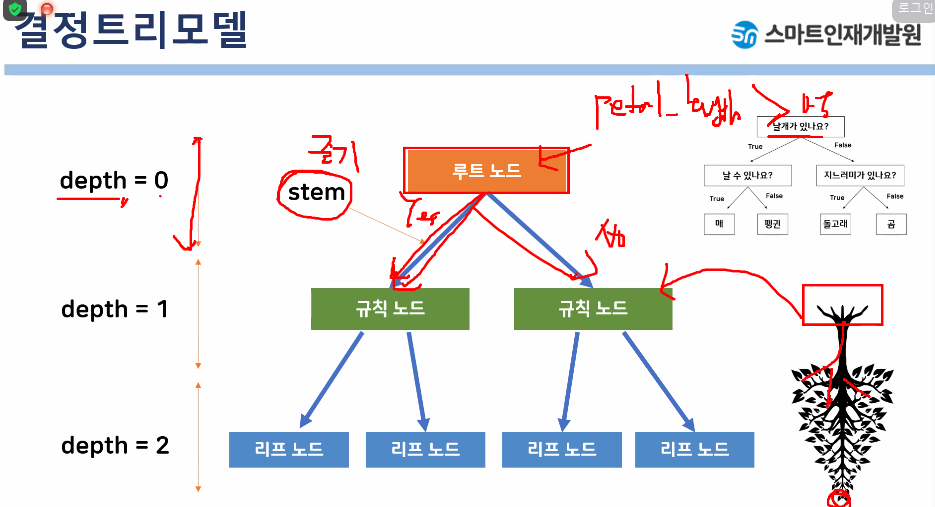
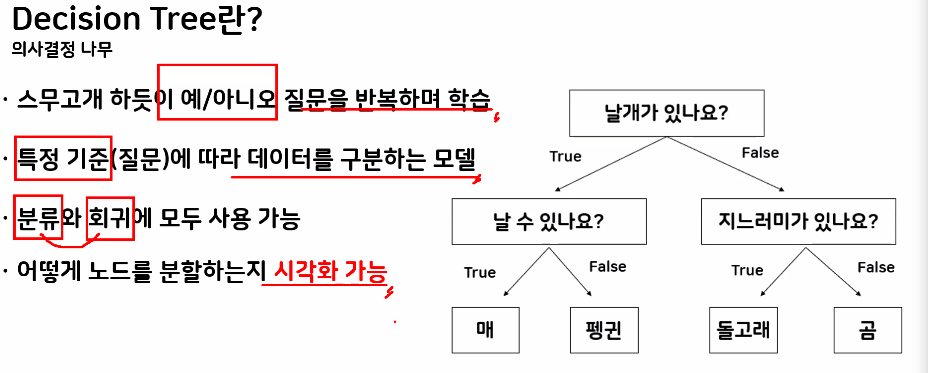
- knn 의 같은 경우 시각화가 안되서 구분이 잘 안가지만
- Decision Tree는 어떤 질문으로 분류를 했는지 한눈에 볼 수 있게 그래프로 그려줌
- 질문 :  불순도가 낮아지는 방향으로 한다
- 불순도에 따라 노드를 나눔
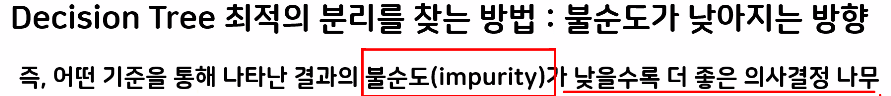

## 목표
- 버섯의 특징을 활용하여 독/식용 버섯을 분류
- DecisionTree 시각화 & 과대적합 속성 제어

In [1]:
#1. 데이터를 로딩
#2. 전체 컬럼, 행 숫자 파악
#3. 결측치 파악
#4. 문제와 답 분리
#5. 기술통계 -> 범주형 데이터(=문자열 데이터) : 갯수, 최빈값, 종류
#6.  label의 비율을 확인

In [2]:
# 라이브러리
import pandas as pd

# mushroom.csv 파일 가져오기
data = pd.read_csv('mushroom.csv')
data

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


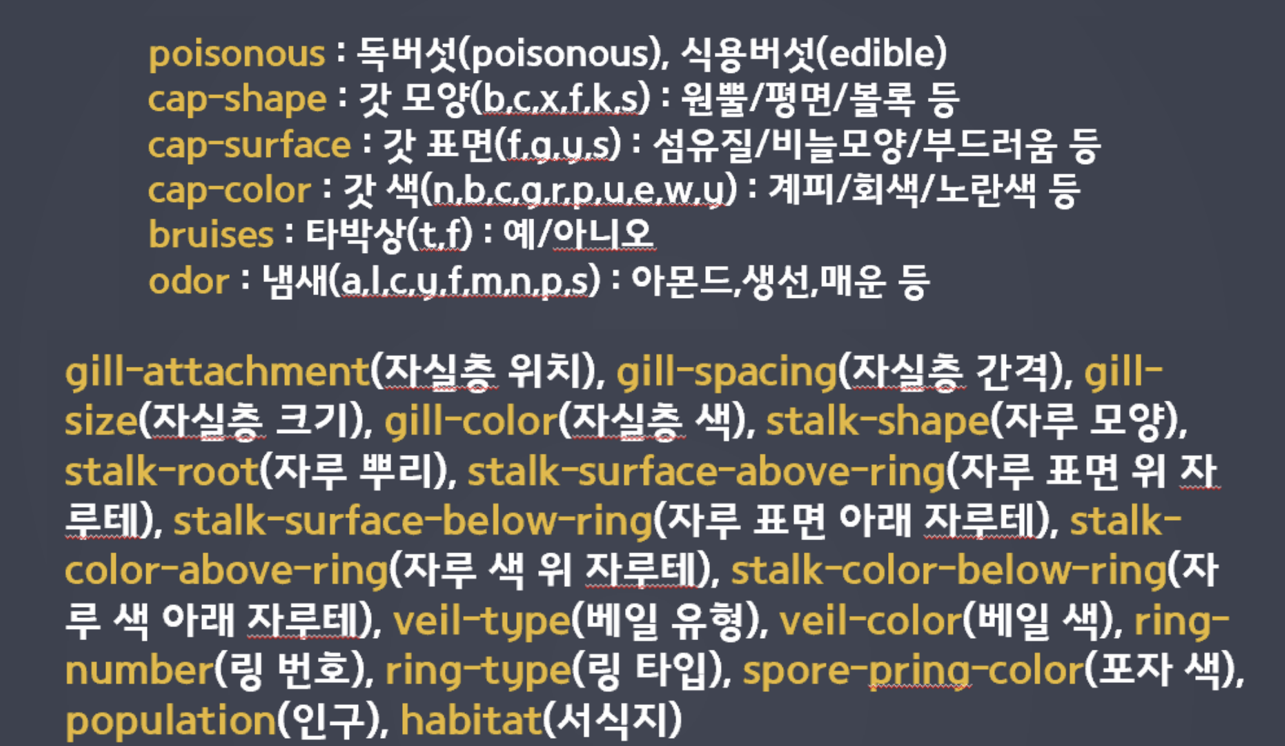

In [3]:
# data의 크기 , 모양 확인
data.shape

(8124, 23)

In [4]:
# data의 결측치/행 개수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  


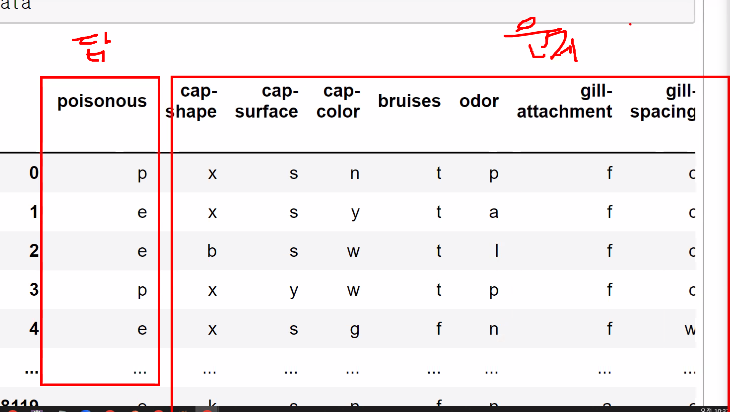
## 문제와 답 데이터로 분리 -> loc, iloc 인덱서 활용
- 문제 = X
- 답 = y


In [5]:
# 답 (독성이 있는지)
# y = data.loc[:,'poisonous'] 를 아래처럼 그냥 표현해도됌
y=data['poisonous']
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: poisonous, Length: 8124, dtype: object

In [6]:
# 문제
X = data.iloc[:,1:]
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [7]:
# y(답)데이터에서 p와 e의 개수 확인 -> .value_counts() 메소드 사용
# e(edible) : 식용버섯
# p(poisonous) : 독 버섯
y.value_counts()

e    4208
p    3916
Name: poisonous, dtype: int64

# 참고사항 (함수와 메소드 구분)
## 함수
print() <- 안에 매개변수 들어감, 기능이 있음
## 메소드
어떤 것(데이터프레임..등등)이 가지고 있는 기능  

예) `value_counts() 만 단독으로 사용 불가능`  

`y 라는 시리즈가 사용하겠습니다` 라고 명시해줘야함  

`y.value_counts()`

In [8]:
# 범주형 데이터 기술 통계 확인
data.describe()
# 중복을 제거한 컬럼 개수
# top - 최빈값
# freq - 최빈값의 빈도수

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# 인코딩 (object(문자열) = 범주형 은 머신러닝을 하지못함) 
## 인코딩 : 범주형/문자열/이산형 데이터 -> `수치형/연속형데이터`으로 바꿔야 가능
### 문자열 -> 숫자형 
- 레이블 인코딩 / 원핫인코딩 
  
### `레이블 인코딩` : 거리기반의 머신러닝의 경우에, 숫자가 크다고해서 더 높은 가중치를 줄수도 있는데, 이때 `정확도(예측성능)이 떨어질 수 있다` 라는 단점
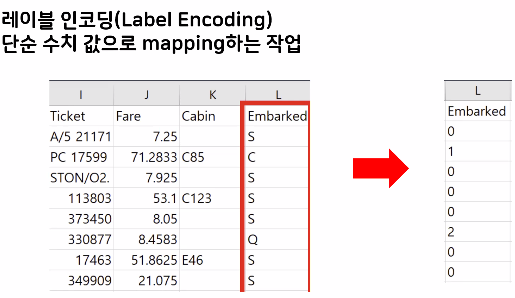  
### `원핫인코딩` : 0또는 1이라는 값만 부여해서 `정확성은 올라가지만 데이터효율(컬럼이 늘어남)이 비교적 떨어짐`
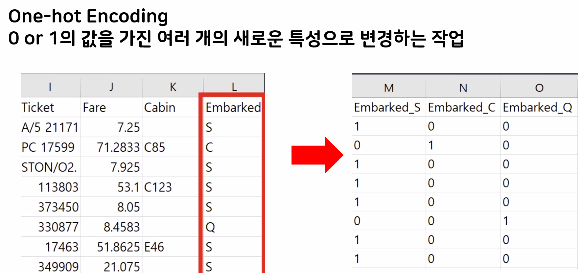

### 레이블 인코딩
- 단순 수치 값으로 mapping하는 작업
- 숫자 값의 크고 작음에 대한 특성으로 인해 예측성능이 떨어지는 경우가 발생함

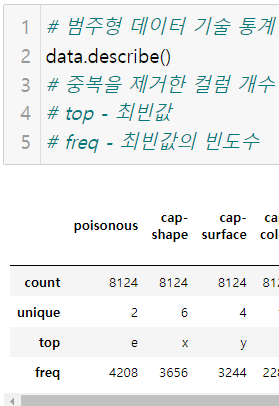
## 위에서 unique 행은 describe 메소드에서 제공되는 행의 이름임

# 레이블 인코딩 방법 1

In [9]:
# 1. habitat 특성(컬럼)에서 데이터의 중복을 제거한 값 확인 -> .unique() 메소드 사용
X['habitat'].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

In [10]:
# 2. habitat 특성(컬럼)에서 데이터의 중복을 제거한 값 확인 -> .unique() 메소드 사용
X.loc[ : , 'habitat'].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

### 매핑 : 데이터를 연결한다 (ex) u-1, g-2 ,...)
-> 딕셔너리 (key : value ) 자료형태가 좋음

In [11]:
# 매핑 
habitat_dict = {
    'u' : 2,
    'g' : 1,
    'm' : 3,
    'd' : 5,
    'p' : 4,
    'w' : 6,
    'l' : 7
}
habitat_dict

{'u': 2, 'g': 1, 'm': 3, 'd': 5, 'p': 4, 'w': 6, 'l': 7}

In [12]:
# mapping -> .map() 메소드 사용
X['habitat'].map(habitat_dict)

0       2
1       1
2       3
3       2
4       1
       ..
8119    7
8120    7
8121    7
8122    7
8123    7
Name: habitat, Length: 8124, dtype: int64

# 레이블 인코딩 방법2 : LableEncoder 사용(sklearn)

In [13]:
from sklearn.preprocessing import LabelEncoder

items = X['habitat'].unique()

# LabelEncoder를 객체로 생성
encoder = LabelEncoder()

#.fit() : 레이블 인코더를 학습시킴
encoder.fit(items)

# .transfrom() : 학습된 인코더를 사용하여 데이터를 변환
labels = encoder.transform(items)

print('인코딩 변환값 :' ,labels)

인코딩 변환값 : [5 1 3 0 4 6 2]


In [14]:
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['d' 'g' 'l' 'm' 'p' 'u' 'w']


## 원핫 인코딩
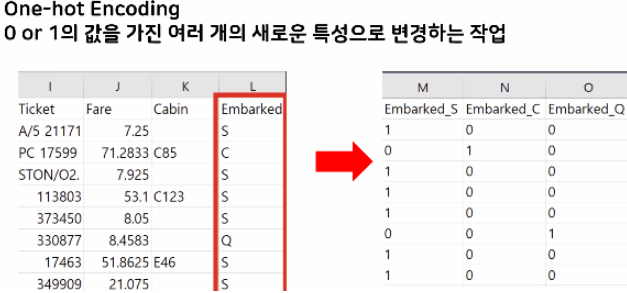
- 특성을 세부적으로 나눠서 생각할 수 있음
- 단어를 표현하는 가장 기본적인 표현 방법
- 필요한 공간이 계속 늘어나 저장 공간 측면에서는 비효율적인 방법

In [15]:
# get_dummies() 메소드 활용 -> pandas 라이브러리에서 제공해줌
X_one_hot = pd.get_dummies(X) # 0과 1로만 이루어진 열을 생성
X_one_hot

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [16]:
# 원핫인코딩 이전과 원핫인코딩 이후 특성 비교하기
# 특성 -> 컬럼
print("원핫 인코딩 이전 특성 : \n", X.columns)
print("원핫 인코딩 이후 특성 : \n", X_one_hot.columns)

원핫 인코딩 이전 특성 : 
 Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')
원핫 인코딩 이후 특성 : 
 Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)


# 모델링

In [55]:
# train_test_split 불러오기
from sklearn.model_selection import train_test_split
# "문제(X_one_hot)와 답 데이터(y)"를 훈련셋과 테스트 셋 ( 7 : 3 ) 으로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_one_hot,
                                                            y,
                                                            test_size = 0.3)

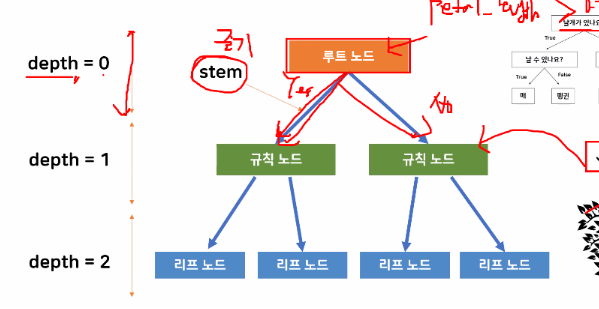
- max_depth = 3 => 트리가 더이상 자라지 않도록 깊게 설정

In [18]:
# 사이킷런 라이브러리<-결정트리 모델 생성
from sklearn.tree import DecisionTreeClassifier
# 결정트리 모델 생성 - tree 라는 변수에 담아주기
# max_depth -> 하이퍼 파라미터 : 과대적합을 제어할수있음
tree = DecisionTreeClassifier(max_depth = 3)
tree

DecisionTreeClassifier(max_depth=3)

# `모델 생성할 때` = `모델을 호출한다`
## -> 모델명을 그대로 적고 () 붙이면 됨
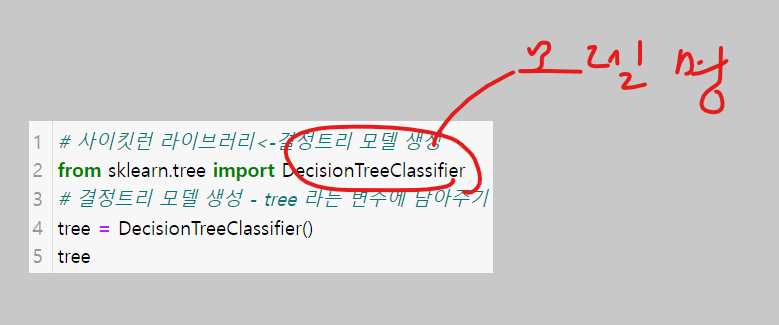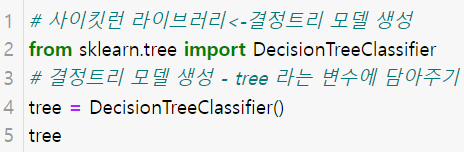

In [19]:
# 훈련 - .fit() 메소드 활용
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

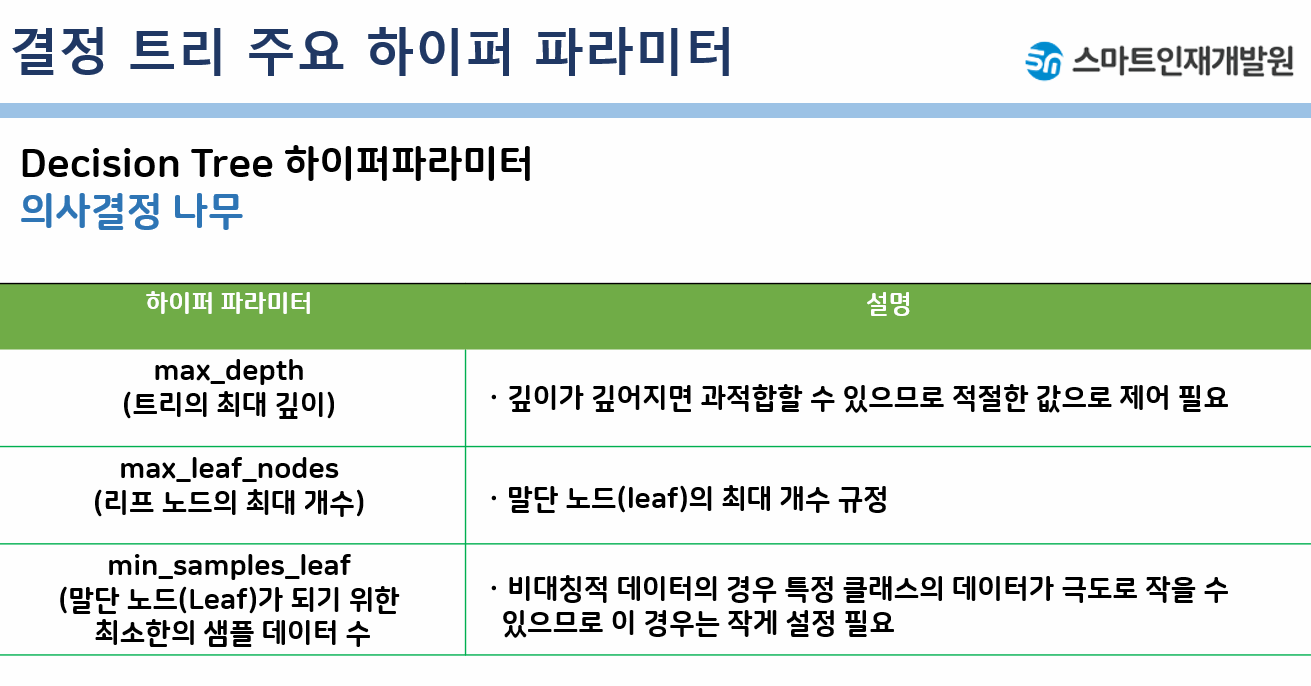
- max_depth : 얼마나 깊이 성장을 할지
- max_leaf_nodes : 말단의 개수 정하기
- min_samples_leaf : 샘플의 개수 정하기

In [20]:
# 예측하기 - predict() 메소드 활용
pre = tree.predict(X_test)
pre

array(['p', 'e', 'e', ..., 'e', 'e', 'p'], dtype=object)

In [21]:
# 위 값을 y_test 와 비교하면 정확도 평가 가능
y_test
# 일일이 비교하는게 아니라 아래의 평가하는 함수를 사용

5595    p
2286    e
348     e
5520    p
2533    p
       ..
2365    e
2957    e
1383    e
1640    e
6858    p
Name: poisonous, Length: 2438, dtype: object

In [22]:
# 정확도 평가

# 평가하는 함수 불러오기
from sklearn import metrics

# metrics / accuracy_score 함수 사용
print("예측 정확도 : " , metrics.accuracy_score(pre, y_test))

예측 정확도 :  0.9864643150123051


# 결정트리 시각화 
### 원래는 시각화패키지를 설치해야하지만, 다른 방법으로 해본다

In [23]:
# 시각화 라이브러리 불러오기
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [24]:
X_one_hot

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [25]:
#X_one_hot의 컬럼이름만 뽑기
X_one_hot.columns

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)

In [26]:
# 아래 그래프의 class 의 값이 한글폰트가 깨지기때문에 한글 인코딩해줘야함
plt.rcParams['font.family'] = 'Malgun Gothic'

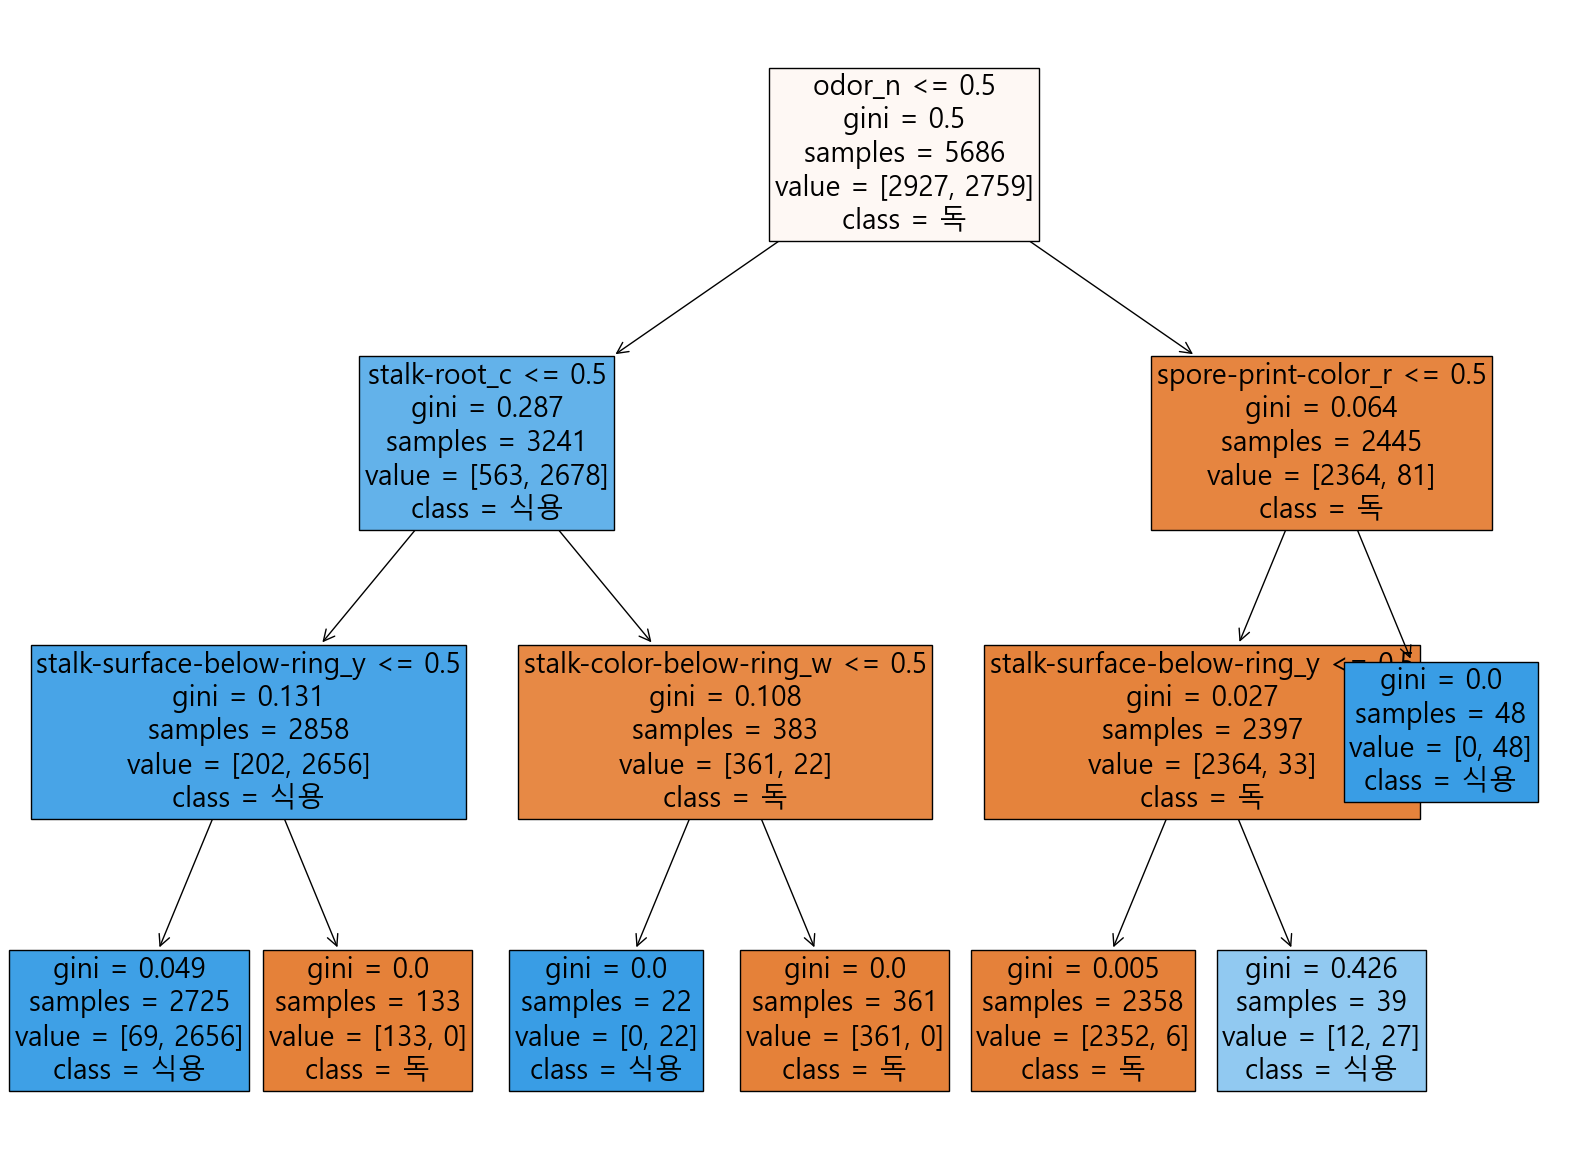

In [27]:
# figsize - 그래프의 크기
plt.figure(figsize =(20,15))
#plot_tree(모델명, 색깔넣기, 클래스이름 = ['찾고자하는이름1', '찾고자하는이름2'], 특성이름(컬럼이름)<-"리스트형태"로 넣어줘야함)
plot_tree(tree,filled= True, class_names=['독','식용'], feature_names = list(X_one_hot.columns), fontsize=20)
plt.show()

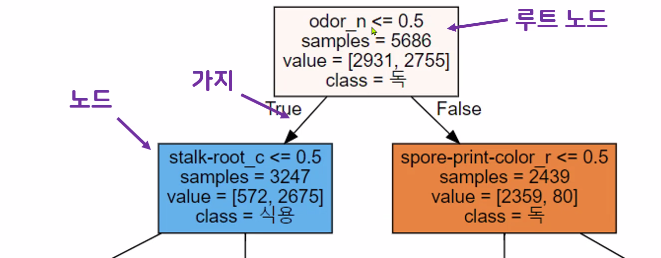
- odor_n <=0.5 : 질문 : 너가 어떤 기준으로 쪼갤지 ( 특성 <=0.5 이니? -> true/false )  
- samples : 데이터의 개수  
- value : 클래스별로 갯수 분류
- class = 독 : 최상단의 노드에서는 독이라는 샘플의개수가 더 많아서   
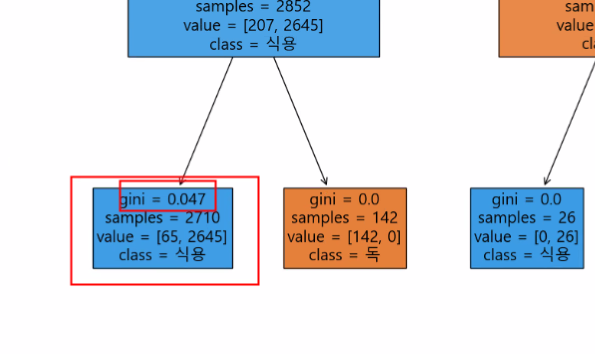  
- 리프 노드에서  
- gini : 지니계수 = 불순도가 어느 비율로 있는지  
- gini = 0 : 불순도가 0  
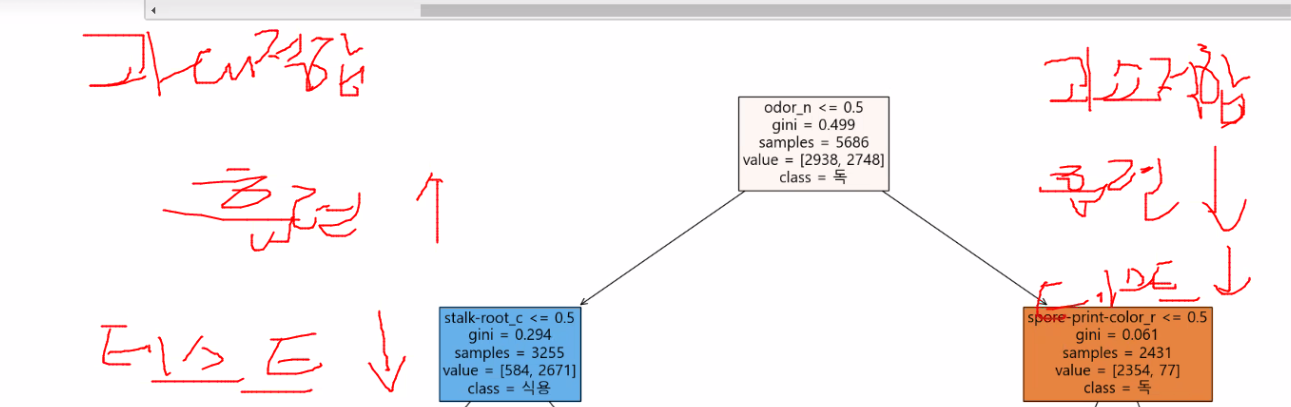
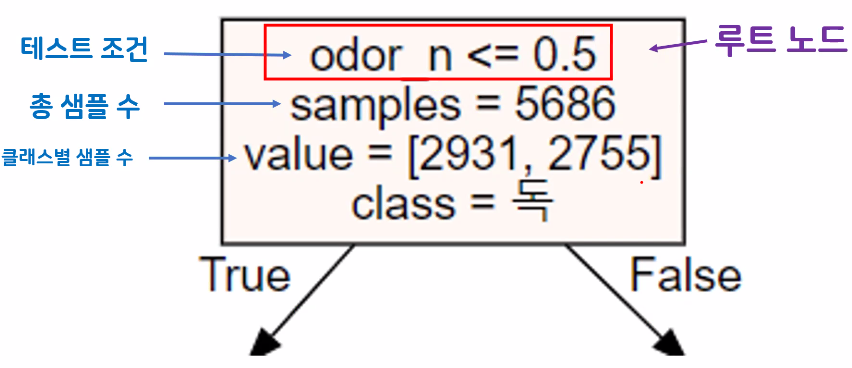

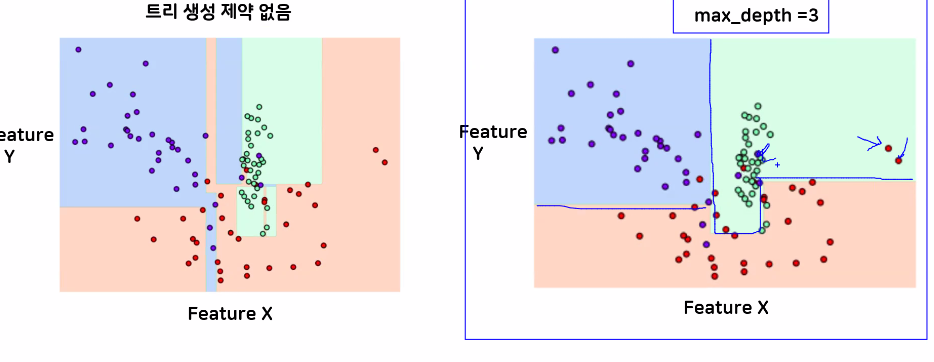      
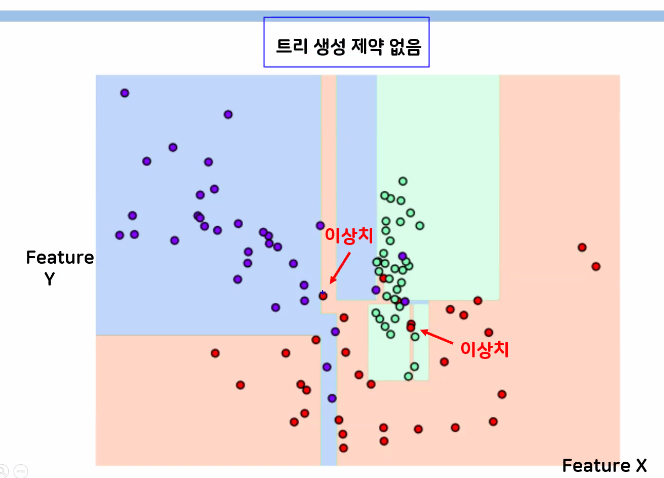
- max_depth를 제약없이 하게되면 이상치까지 모두 훈련데이터에 적용함으로써 과대적합이 일어남
- max_depth를 과도하게 잡지 않음으로써 훈련데이터에서는 높은성능이 나오지않을지라도   
- 실제 데이터에서 성능이 높게나온다

## 특성선택  
- tree 모델의 특성중요도

In [31]:
fi = tree.feature_importances_
print("특성중요도 :\n" , fi)

특성중요도 :
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.65491388 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.1917819
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.10362431 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.01548971 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.    

In [41]:
# 컬럼이름은 '특성중요도'로 설정 (columns = ['컬럼명'] )
# 내림차순 정렬 진행 -> sort_values(by = '컬럼명' , ascending = True/False)
importance_df = pd.DataFrame(fi, index = X_one_hot.columns, columns = ['특성중요도'])
importance_df.sort_values(by = '특성중요도', ascending = False)

# ordor_n 이라는 특성이 가장 중요한 특성으로 나타남

,특성중요도
odor_n,0.654914
stalk-root_c,0.191782
stalk-surface-below-ring_y,0.103624
spore-print-color_r,0.034190
stalk-color-below-ring_w,0.015490
...,...
gill-size_b,0.000000
gill-spacing_w,0.000000
gill-spacing_c,0.000000
gill-attachment_f,0.000000


# 하이퍼파라미터 튜닝

In [56]:
test_list = []
train_list = []
for n in range(1,105,2) :  # n : 1~104 까지 바꿨을때 정확도 보려고
    # 결정트리 모델 생성
    tree = DecisionTreeClassifier(max_depth = n)
    # 결정트리 모델 훈련
    tree.fit(X_train, y_train)
    
    # 테스트 성능 예측
    test_pre = tree.predict(X_test)
    # 테스트 성능 평가
    test_score = metrics.accuracy_score(test_pre, y_test)
    # test_list 성능 평가 값 담아주기
    test_list.append(test_score)
    # print("max_depth : ",n,"-", test_score)
    
    # 훈련에서의 성능 예측
    train_pre = tree.predict(X_train)
    # 훈련데이터 성능 평가
    train_score = metrics.accuracy_score(train_pre, y_train)
    # train_list에 성능평가 값 담아주기
    train_list.append(train_score)
    

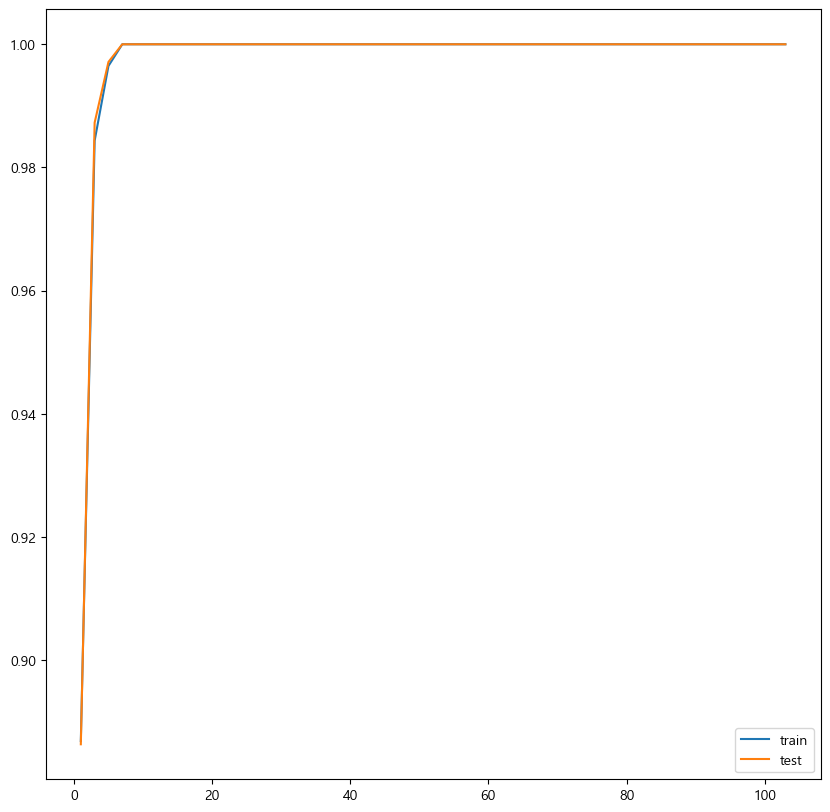

In [57]:
# 훈련데이터와 테스트데이터 성능 평가 비교
plt.figure(figsize = (10,10))

# 훈련데이터 성능값 그래프로 나타내기
plt.plot(range(1,105,2), train_list, label = 'train')

# 테스트데이터 성능값 그래프로 나타내기
plt.plot(range(1,105,2), test_list, label = 'test')

# 범례표시
plt.legend()
# 그래프 보여주기
plt.show()

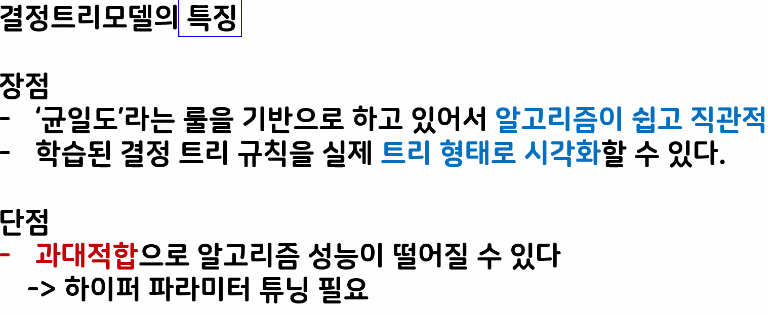

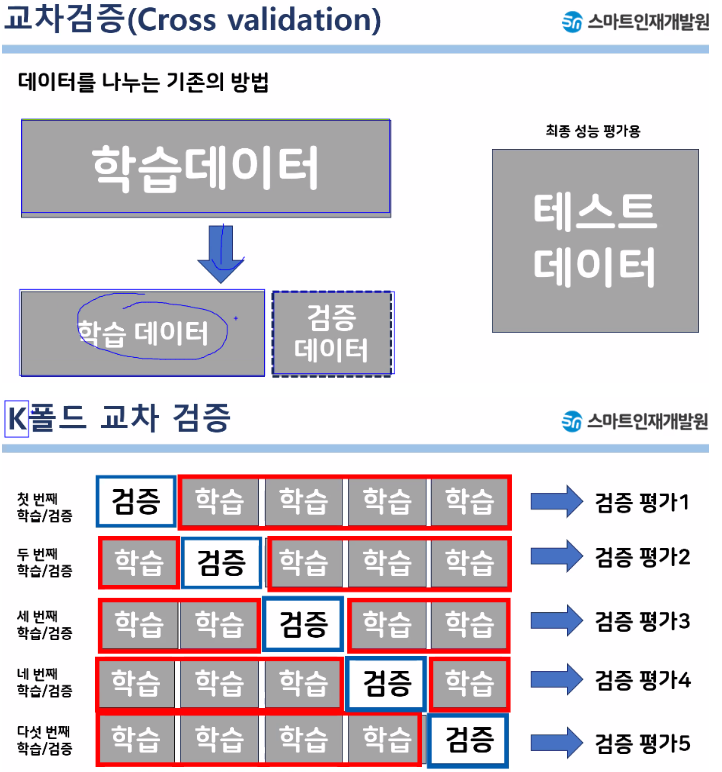
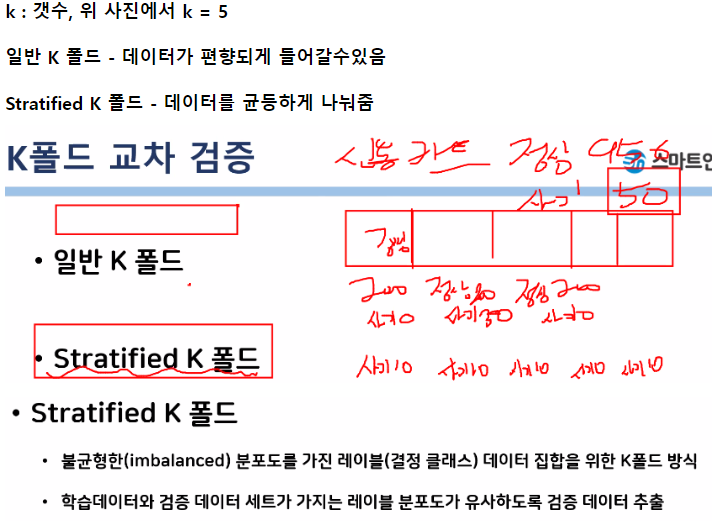
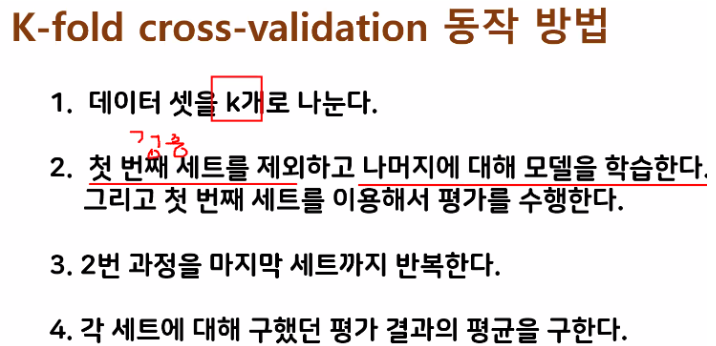

## K 폴드 교차검증
- K 개의 데이터 폴드 세트를 만들어서 K번만큼 각 세트에 학습과 검증 평가를 반복적으로 수행함

In [63]:
from sklearn.model_selection import KFold

import numpy as np
# 데이터프레임을 넘파이배열로 변환
features = X_one_hot.to_numpy()
label = y.to_numpy()

# 5개의 폴드 세트로 분리하는 KFold 객체생성 -> KFold(몇개 세트로 나눠줄건지)
kfold = KFold(n_splits=5)



In [75]:
# 정석으로 하는 방법

# 세트별 정확도를 담을 리스트 생성
cv_accuracy = [] # 내가 교차검증을 한번, 2번...5번 할때 결과값을 넣어줄 리스트

# 내가 갖고있는 X_one_hot 데이터를 train_index와 test_index에 나눠서 넣음
# kfold.split -> "KFold 객체의 split() 을 호출하면"세트별 학습용, 검증용 행 인덱스를 반환
for train_index, test_index in kfold.split(X_one_hot) : 
    # 학습용, 검증용 데이터를 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    # 학습 및 예측
    tree.fit(X_train, y_train)
    pre = tree.predict(X_test)
    
    # 반복할때마다 정확도 측정
    accuracy = metrics.accuracy_score(pre, y_test)
    
    cv_accuracy.append(accuracy)
    
print(cv_accuracy)

[1.0, 1.0, 1.0, 1.0, 0.9901477832512315]


In [96]:
# 정석말고 cross_val_score 사용하는 방법
# 사이킷런 라이브러리에서 교차검증을 쉽게해주는 라이브러리 제공
from sklearn.model_selection import cross_val_score

result = cross_val_score(tree,
                   X_train,
                   y_train,
                   cv = 5) # 몇개로 나눌지 설정 , 5개로 나누면 5번 검증을함
result

array([1.        , 1.        , 1.        , 0.99769231, 0.92538462])

In [97]:
# 교차검증 했을때의 평균
result.mean()

0.9846153846153847